In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from statsmodels.tsa.arima_model import ARIMA


import warnings

from matplotlib import pyplot

# from pyramid.arima import auto_arima
from pandas.plotting import autocorrelation_plot
from math import sqrt



In [2]:
def parsealldate(x):
    timestamp = pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
#     timestamp = timestamp.dt.ceil(freq='s') 
    return timestamp

In [75]:
trainData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_train.csv",  parse_dates=[0])
testData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_test.csv", parse_dates=[0])
trainData['timestamp'] = trainData.timestamp.dt.ceil(freq='s')
testData['timestamp'] = testData.timestamp.dt.ceil(freq='s')

In [76]:
trainData = trainData.set_index('timestamp')['latency']
testData = testData.set_index('timestamp')['latency']

# trainData.index = pd.DatetimeIndex(trainData.index).to_period('ms')
# testData.index = pd.DatetimeIndex(testData.index).to_period('ms')



In [77]:
trainData = trainData.dropna()

In [85]:
bestModel = auto_arima(trainData, trace=True, error_action='ignore', suppress_warnings=True,method='nm')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-92578.647, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-96190.123, Time=1.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-92580.647, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-97693.645, Time=1.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-98377.843, Time=2.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-98856.954, Time=2.87 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-99204.277, Time=3.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-100210.537, Time=2.94 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-100383.304, Time=2.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-100183.462, Time=2.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(5,1,2)(0,0,0)[0] interc

In [65]:
trainData.dropna()

timestamp
2020-04-07 16:34:46    0.015102
2020-04-07 16:38:52    0.015117
2020-04-07 16:39:52    0.015297
2020-04-07 16:43:20    0.014803
2020-04-07 16:47:22    0.014817
2020-04-07 16:49:07    0.016625
2020-04-07 16:49:42    0.015321
2020-04-07 16:49:48    0.015231
2020-04-07 16:50:07    0.014882
2020-04-07 16:50:39    0.016697
2020-04-07 16:50:39    0.015010
2020-04-07 16:51:21    0.014791
2020-04-07 16:52:43    0.016027
2020-04-07 16:54:14    0.014816
2020-04-07 16:54:16    0.014925
2020-04-07 16:55:36    0.015118
2020-04-07 16:56:37    0.016501
2020-04-07 16:56:59    0.015011
2020-04-07 16:58:00    0.014948
2020-04-07 16:59:50    0.015348
2020-04-07 17:02:21    0.016283
2020-04-07 17:04:33    0.025141
2020-04-07 17:05:01    0.016521
2020-04-07 17:06:50    0.016227
2020-04-07 17:07:56    0.015287
2020-04-07 17:10:11    0.016890
2020-04-07 17:10:30    0.015101
2020-04-07 17:11:16    0.016773
2020-04-07 17:12:33    0.015959
2020-04-07 17:13:57    0.015252
                         ...  

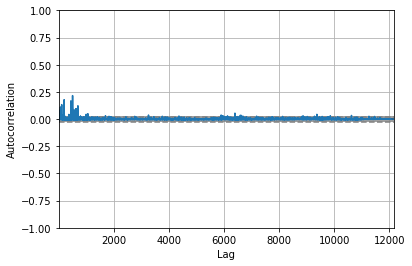

In [87]:
autocorrelation_plot(trainData)


In [88]:
def runArima(trainData, testData, p,d,q, modelName, solver):
    
    model = ARIMA(trainData, order=(p,d,q))
    model_fit = model.fit(solver = solver)
    model_fit.save('./arimaModels/'+ modelName + '.pkl')

    history = [x for x in trainData]
    
    predictions = list()
# walk-forward validation
    for t in range(len(testData)):

        walkForwardModel = ARIMA(history, order=(p,d,q))
        walkForwardModel_fit = walkForwardModel.fit(solver = solver,disp=False)
        output = walkForwardModel_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = testData[t]
        history.append(obs)
        

    return predictions

In [86]:
runArima(trainData, testData[0:1], 1,1,0, 'dummyModel', 'nm')

Optimization terminated successfully.
         Current function value: -3.956734
         Iterations: 13
         Function evaluations: 27


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

[array([0.01583637])]

In [92]:
predictions = []

In [93]:
# def runArimaOnLatency():
for i in range(1,4):
    trainFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_train.csv"
    testFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_test.csv"
    validationFileName = "../parse_tactics/normalized_tva_server_"+str(i)+"_tactic_1_validation.csv"
    
    trainData = pd.read_csv(trainFileName,  parse_dates=[0])
    testData = pd.read_csv(testFileName, parse_dates=[0])
    validationData = pd.read_csv(validationFileName, parse_dates=[0])
    
    trainData['timestamp'] = trainData.timestamp.dt.ceil(freq='s')
    testData['timestamp'] = testData.timestamp.dt.ceil(freq='s')
    validationData['timestamp'] = validationData.timestamp.dt.ceil(freq='s')
    
    trainData = trainData.set_index('timestamp')['latency']
    testData = testData.set_index('timestamp')['latency']
    validationData = validationData.set_index('timestamp')['latency']

    trainData.index = pd.DatetimeIndex(trainData.index).to_period('ms')
    testData.index = pd.DatetimeIndex(testData.index).to_period('ms')
    validationData.index = pd.DatetimeIndex(validationData.index).to_period('ms')

    trainData = trainData.append(validationData)
    
    print("training server "+ str(i))
    predictions.append(runArima(trainData,validationData,1,1,0,'latency_server'+str(i), solver = 'nm'))

training server 1
Optimization terminated successfully.
         Current function value: -3.984172
         Iterations: 12
         Function evaluations: 25
training server 2
Optimization terminated successfully.
         Current function value: -3.753193
         Iterations: 12
         Function evaluations: 24
training server 3
Optimization terminated successfully.
         Current function value: -1.502614
         Iterations: 12
         Function evaluations: 25


In [94]:
for serverNum in range(len(predictions)):
    pd.DataFrame(predictions[serverNum]).to_csv('./arimaModels/predictions/predictions_server_' + str(serverNum + 1) + '_tactic_1_latency.csv')

In [131]:
for serverNum in range(len(predictions)):
    validationFileName = "../parse_tactics/normalized_tva_server_"+str(serverNum+1)+"_tactic_1_test.csv"
    validationData = pd.read_csv(validationFileName, parse_dates=[0])
    validationData['timestamp'] = validationData.timestamp.dt.ceil(freq='s')
    validationData = validationData['latency']
    # validationData.index = pd.DatetimeIndex(validationData.index).to_period('ms')

    print(rmse(validationData, np.array(predictions[serverNum]).flatten(),axis=0))

0.030898886124865653
0.0036863421746454058
0.05738767666192293


In [129]:
np.array(predictions[0]).flatten()

array([0.01571558, 0.01609122, 0.0160481 , ..., 0.01516092, 0.01621721,
       0.01662555])

In [103]:
rmse?